In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# from kneed import KneeLocator

# Reading Data

In [6]:
data=pd.read_excel("/Users/arpitsudhir/Desktop/customer-segementation-analysis/data/Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
data.shape

(541909, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


There are no missing values

In [9]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


# Data Cleaning and Feature Engineering

In [15]:
data.dropna(inplace=True)

In [16]:
data.shape

(406829, 8)

In [17]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:
data['CustomerID']=data['CustomerID'].astype(str)

In [19]:
data['Amount']=data['Quantity']*data['UnitPrice']

In [20]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
# Grouping data by customer id and amount they spent
df1=data.groupby('CustomerID')['Amount'].sum().reset_index()
df1.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [22]:
#Grouping by frequency by customer id and how frequently they buy products
df2=data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
df2.columns=['CustomerID','Frequency']
df2.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [23]:
df=pd.merge(df1,df2,on='CustomerID',how='inner')
df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [24]:
max_date=max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [25]:
data['Diff']=max_date-data['InvoiceDate']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [26]:
df3=data.groupby('CustomerID')['Diff'].min().reset_index()
df3.columns=['CustomerID','Most_Recent_Engagement']
df3.head()

,CustomerID,Most_Recent_Engagement
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [27]:
df3['Most_Recent_Engagement']=df3['Most_Recent_Engagement'].dt.days
df3.head()

,CustomerID,Most_Recent_Engagement
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [28]:
df_merged=pd.merge(df,df3,on="CustomerID",how='inner')
df_merged.head()

,CustomerID,Amount,Frequency,Most_Recent_Engagement
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

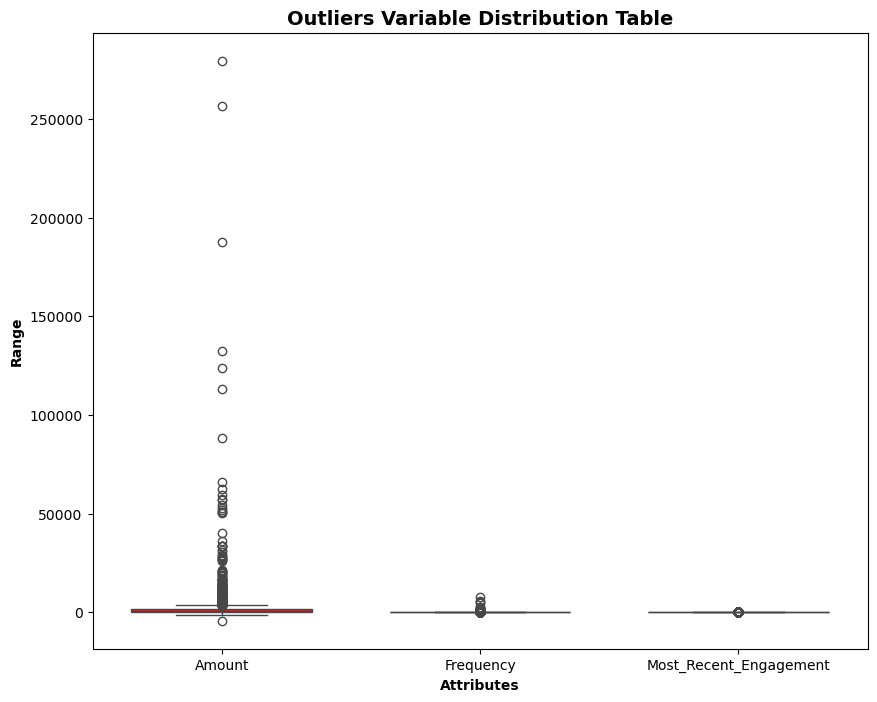

In [29]:
plt.figure(figsize=(10,8))
attributes = ['Amount','Frequency','Most_Recent_Engagement']
sns.boxplot(data = df_merged[attributes], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution Table", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')


**Removing Outliers**

In [30]:
#Removing outliers for Amount
q1=df_merged.Amount.quantile(0.05)
q2=df_merged.Amount.quantile(0.95)
iqr=q2-q1
df_merged=df_merged[(df_merged.Amount>=q1-1.5*iqr) & (df_merged.Amount<=q2+1.5*iqr)]

#Removing outliers for Frequency
q1=df_merged.Frequency.quantile(0.05)
q2=df_merged.Frequency.quantile(0.95)
iqr=q2-q1
df_merged=df_merged[(df_merged.Frequency>=q1-1.5*iqr) & (df_merged.Frequency<=q2+1.5*iqr)]

#Removing outliers for Most_Recent_Engagement
q1=df_merged.Most_Recent_Engagement.quantile(0.05)
q2=df_merged.Most_Recent_Engagement.quantile(0.95)
iqr=q2-q1
df_merged=df_merged[(df_merged.Most_Recent_Engagement>=q1-1.5*iqr) & (df_merged.Most_Recent_Engagement<=q2+1.5*iqr)]


Text(0.5, 0, 'Attributes')

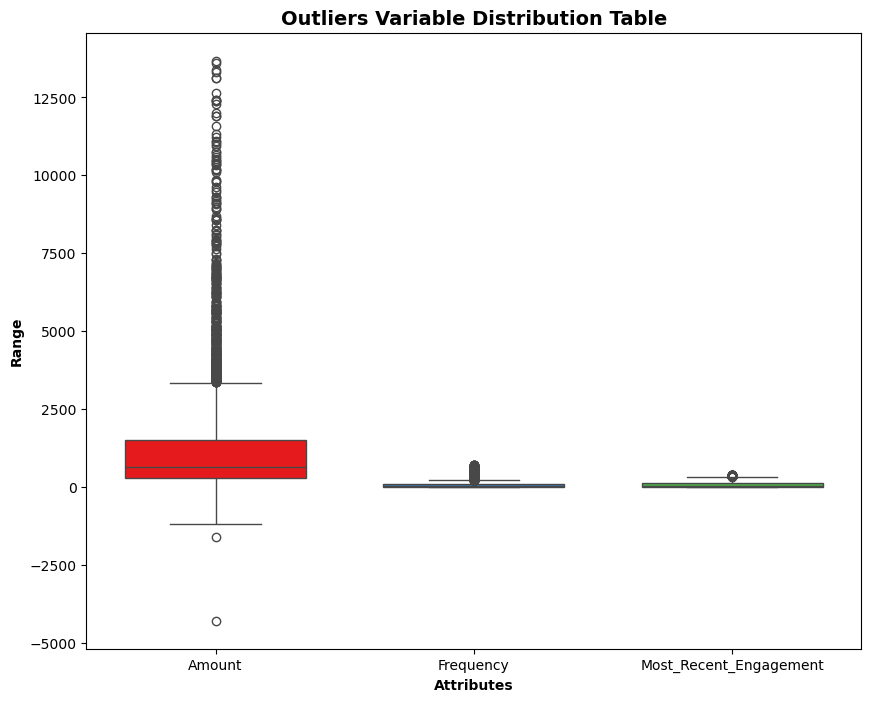

In [31]:
plt.figure(figsize=(10,8))
attributes = ['Amount','Frequency','Most_Recent_Engagement']
sns.boxplot(data = df_merged[attributes], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution Table", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [32]:
df_merged.head()

,CustomerID,Amount,Frequency,Most_Recent_Engagement
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [33]:
df_merged=df_merged[['Amount','Frequency','Most_Recent_Engagement']]
scaler=StandardScaler()
df_merged_scaled=scaler.fit_transform(df_merged)
df_merged_scaled

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [34]:
df_merged_scaled=pd.DataFrame(df_merged_scaled)
df_merged_scaled.columns=['Amount','Frequency','Most_Recent_Engagement']
df_merged_scaled.head()

,Amount,Frequency,Most_Recent_Engagement
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# Building the Model

In [35]:
model=KMeans()
model.fit(df_merged_scaled)

KMeans()

**1.Finding value of k using Elbow graph**

In [36]:
wcss=[] #within cluster sum of squares
for i in range(1,11):
    kmean=KMeans(n_clusters=i)
    kmean.fit(df_merged_scaled)
    wcss.append(kmean.inertia_)
    print("For n_clusters={0}, the Elbow score is {1}".format(i,kmean.inertia_))

For n_clusters=1, the Elbow score is 12879.000000000015
For n_clusters=2, the Elbow score is 7661.8718392930605
For n_clusters=3, the Elbow score is 4433.747689347625
For n_clusters=4, the Elbow score is 3962.814800219402
For n_clusters=5, the Elbow score is 2805.227862597014
For n_clusters=6, the Elbow score is 2392.5488971179166
For n_clusters=7, the Elbow score is 2039.3574732282618
For n_clusters=8, the Elbow score is 1982.2070441935557
For n_clusters=9, the Elbow score is 1847.054570081321
For n_clusters=10, the Elbow score is 1542.0502630685805


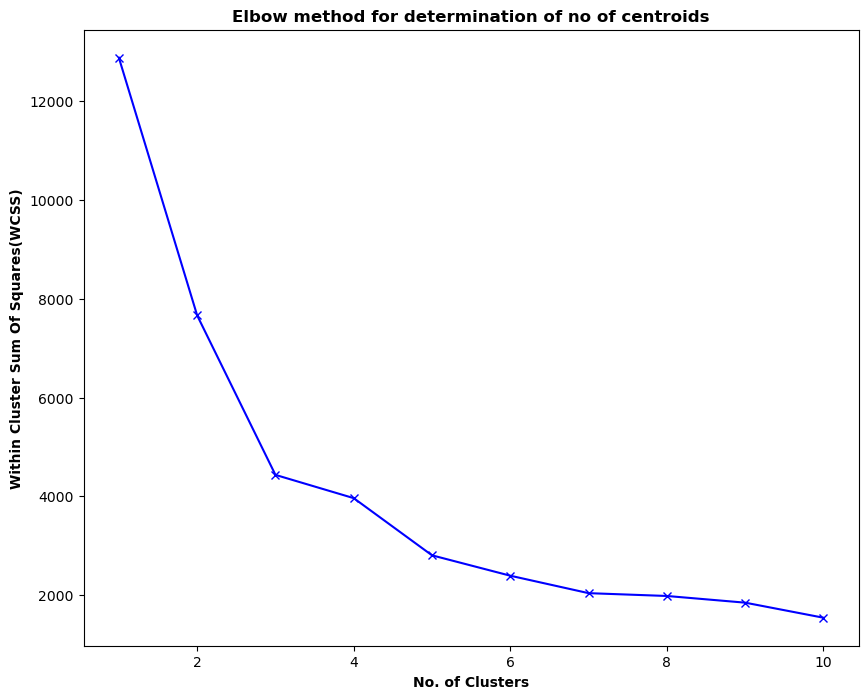

In [37]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,'bx-')
plt.xlabel("No. of Clusters",fontweight="bold")
plt.ylabel("Within Cluster Sum Of Squares(WCSS)",fontweight="bold")
plt.title("Elbow method for determination of no of centroids",fontweight="bold")
plt.show()

**2. KneeLocator Method**

In [38]:
# k=KneeLocator((range(1,11)),wcss,curve="convex",direction="decreasing")
# k.elbow

So we can say that we should use `n_clusters=3`for our Kmeans Clustering model

**3.Silhouette Scoring**

In [39]:
silhouette_scores=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_merged_scaled)
    cluster_labels = kmeans.labels_
    score=silhouette_score(df_merged_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, score))

For n_clusters=2, the silhouette score is 0.4025940739563748
For n_clusters=3, the silhouette score is 0.5085084004374336
For n_clusters=4, the silhouette score is 0.47782241003860476
For n_clusters=5, the silhouette score is 0.46573610737067755
For n_clusters=6, the silhouette score is 0.44212586871003684
For n_clusters=7, the silhouette score is 0.3841800780222554
For n_clusters=8, the silhouette score is 0.39339722087447837
For n_clusters=9, the silhouette score is 0.37988616671765313
For n_clusters=10, the silhouette score is 0.35221324094628803


So we decide `n_clusters=3` for our model

In [40]:
model=KMeans(n_clusters=3)
model.fit(df_merged_scaled)
model.labels_

array([2, 0, 1, ..., 2, 1, 1], dtype=int32)

In [41]:
df_merged['Cluster_Label']=model.labels_
df_merged.head()

,Amount,Frequency,Most_Recent_Engagement,Cluster_Label
0,0.00,2,325,2
1,4310.00,182,1,0
2,1797.24,31,74,1
3,1757.55,73,18,1
4,334.40,17,309,2


In [42]:
segmented_data=df_merged
segmented_data.head()

,Amount,Frequency,Most_Recent_Engagement,Cluster_Label
0,0.00,2,325,2
1,4310.00,182,1,0
2,1797.24,31,74,1
3,1757.55,73,18,1
4,334.40,17,309,2


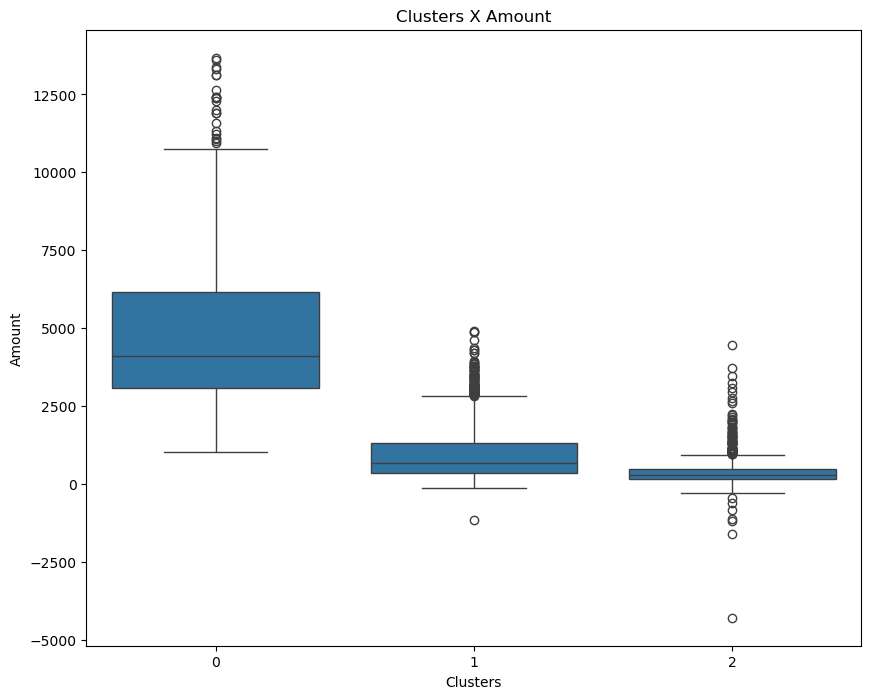

In [43]:
plt.figure(figsize=(10,8))
sns.boxplot(x=segmented_data['Cluster_Label'],
            y=segmented_data['Amount'])
plt.xlabel("Clusters")
plt.ylabel("Amount")
plt.title("Clusters X Amount")
plt.show()

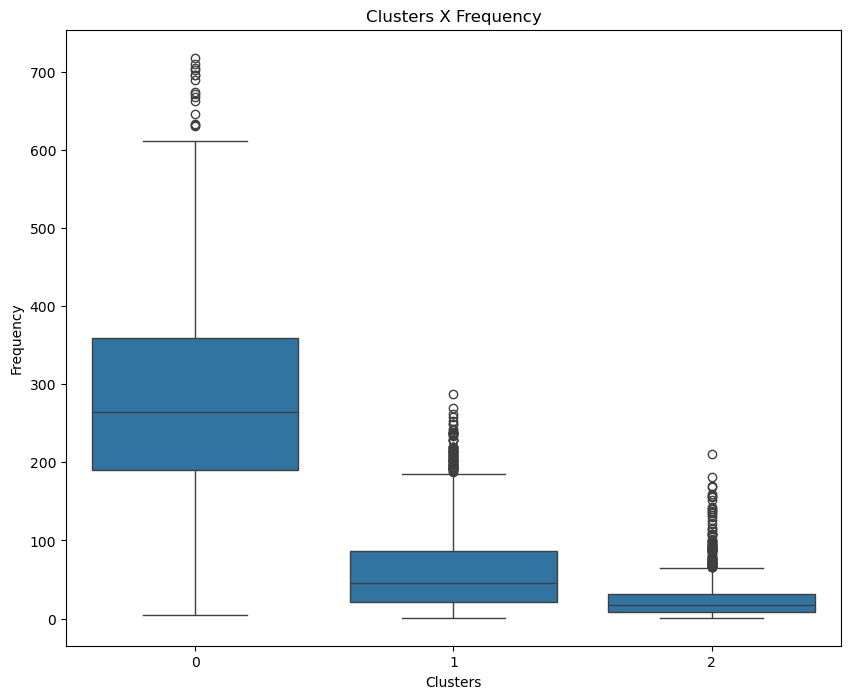

In [44]:
plt.figure(figsize=(10,8))
sns.boxplot(x=segmented_data['Cluster_Label'],
            y=segmented_data['Frequency'])
plt.xlabel("Clusters")
plt.ylabel("Frequency")
plt.title("Clusters X Frequency")
plt.show()

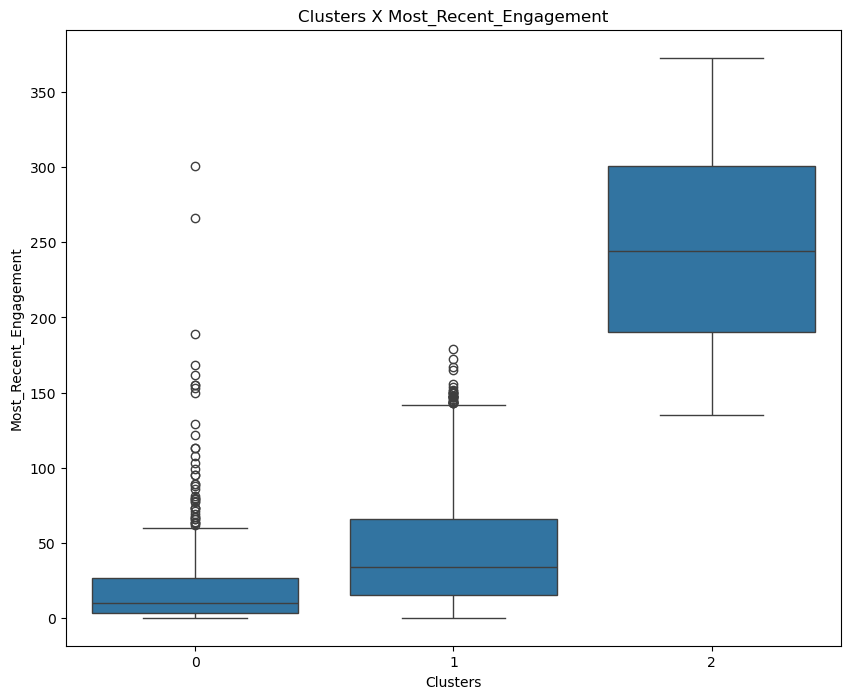

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot(x=segmented_data['Cluster_Label'],
            y=segmented_data['Most_Recent_Engagement'])
plt.xlabel("Clusters")
plt.ylabel("Most_Recent_Engagement")
plt.title("Clusters X Most_Recent_Engagement")
plt.show()

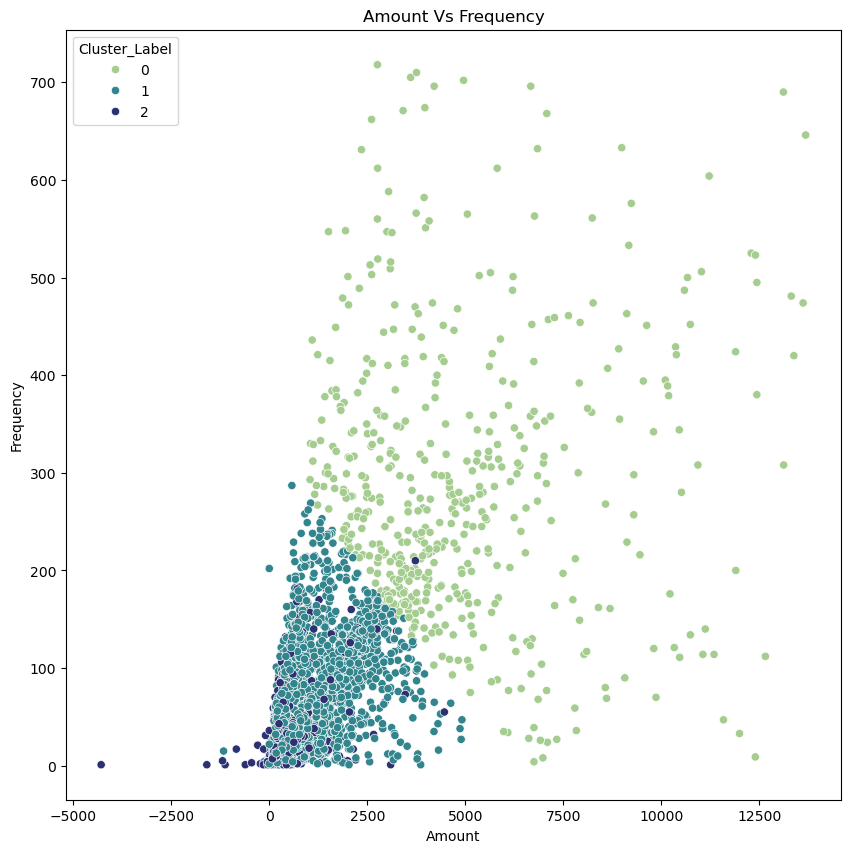

In [46]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Amount',
                y='Frequency',
                data=segmented_data,
                hue='Cluster_Label',
                palette="crest")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.title("Amount Vs Frequency")
plt.show()

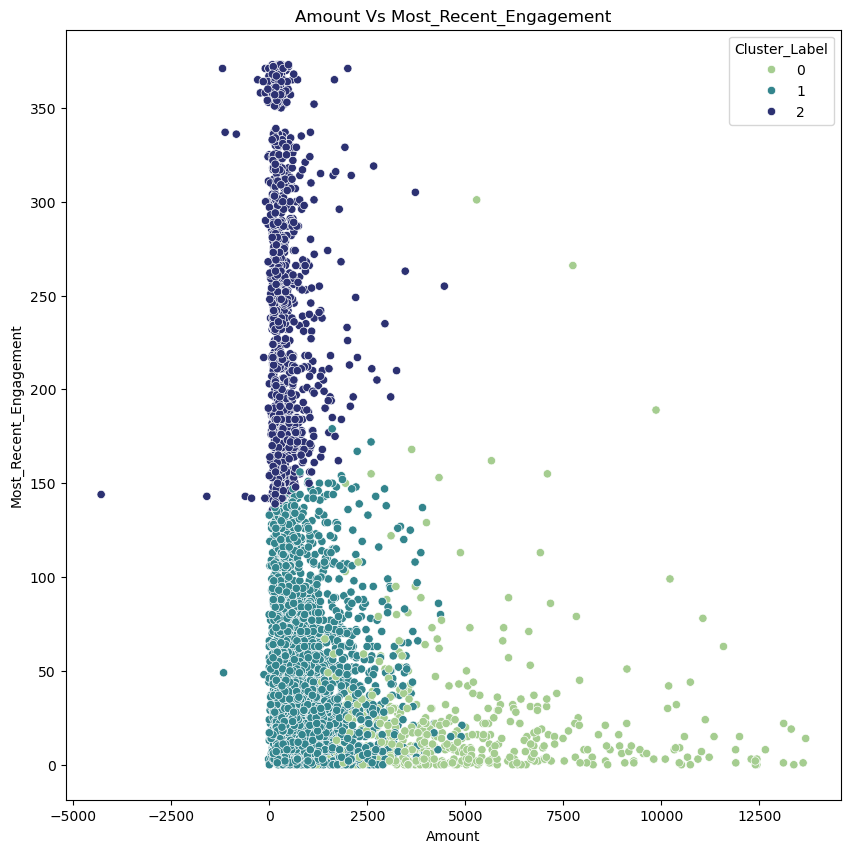

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Amount',
                y='Most_Recent_Engagement',
                data=segmented_data,
                hue='Cluster_Label',
                palette="crest")
plt.xlabel("Amount")
plt.ylabel("Most_Recent_Engagement")
plt.title("Amount Vs Most_Recent_Engagement")
plt.show()

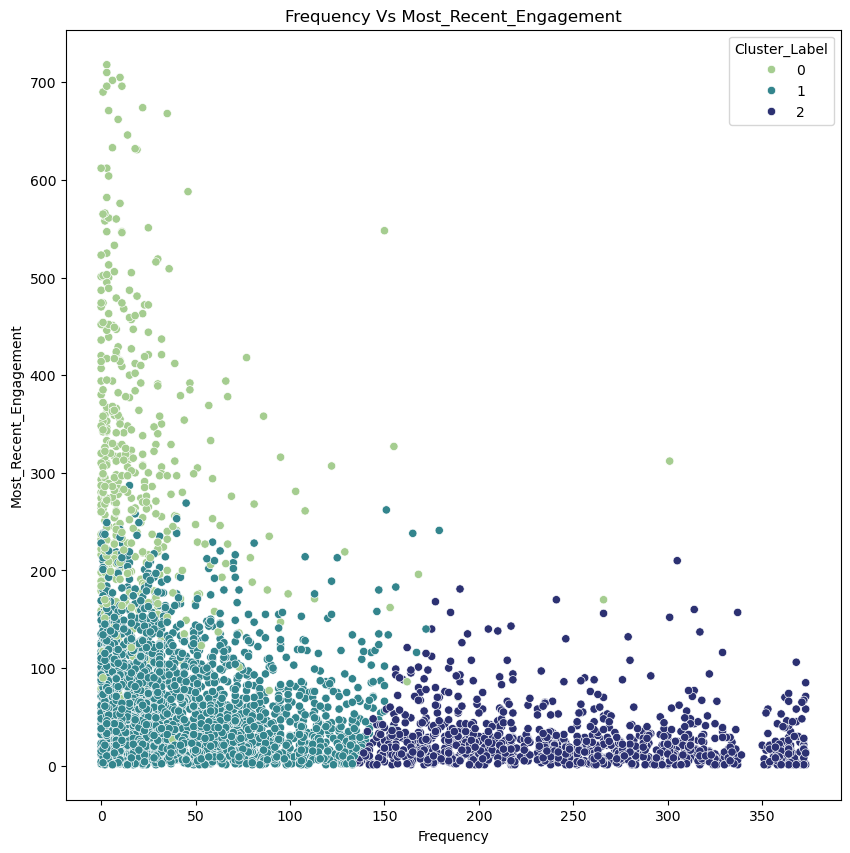

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='Frequency',
                x='Most_Recent_Engagement',
                data=segmented_data,
                hue='Cluster_Label',
                palette="crest")
plt.xlabel("Frequency")
plt.ylabel("Most_Recent_Engagement")
plt.title("Frequency Vs Most_Recent_Engagement")
plt.show()

In [49]:
import joblib
joblib.dump(model,"model.joblib")

['model.joblib']